# Preparing emission data for ICON-OEM

This tutorial explains how to create emissions files that can be used in 
ICON-OEM.

Documentation for ICON-ART can be found here:
https://www.icon-art.kit.edu/userguide/index.php


## Load the inventory 

For this examples we are using the EDGAR inventory.

In [2]:
from pathlib import Path
from emiproc.inventories.edgar import download_edgar_files
from emiproc.inventories.edgar import EDGARv8

# If you need to download the EDGAR files, look at the edgar tutorial
# Load the edgar inventory
inv = EDGARv8("./edgar/v8.0_*.nc")

## Load the ICON Grid and remap the emissions

The ICON grid is a icosahedral grid made from triangles. 

It is usually a bit of a struggle to work with this grid, but emiproc 
provides a necessary abstraction level to work with it.

The grid is defined in a file which we can download from the ICON website.




In [3]:
import urllib.request
from pathlib import Path

from emiproc.grids import ICONGrid, WGS84_PROJECTED
from emiproc.regrid import remap_inventory


grid_download_url = (
    "http://icon-downloads.mpimet.mpg.de/grids/public/edzw/icon_grid_0034_R03B06_N02.nc"
)
icon_grid_file = Path(".") / grid_download_url.split("/")[-1]

# Download the grid if missing
if not icon_grid_file.exists():
    urllib.request.urlretrieve(grid_download_url, icon_grid_file)

icon_grid = ICONGrid(icon_grid_file)
icon_grid

ICONGrid(icon_grid_0034_R03B06_N02)

In [4]:
# Convert to a planar crs before remapping
inv.to_crs(WGS84_PROJECTED)

# Does the remapping, returning an inventory on the ICONGrid
remaped_on_icon = remap_inventory(inv, icon_grid)

## Export to OEM inputs 

ICON-ART has various ways of inputting emissions. 

Here we use the Online Emission Module (OEM) which scales the emission
based on cyclic temporal profiles.


The function :py:func:`emiproc.exports.icon.export_icon_oem` will generate 
the files needed for OEM in the output_dir.
You can then add this files in your namelist and add the tracers in the xml files.

Note that you have to options for the Temporal Profiles in OEM:

* Three cycles (hour of day, day of week, month of year)
* Hour of year cycle. In this case you will need to set for which year you want
  the profiles.

In [ ]:
from emiproc.exports.icon import export_icon_oem, TemporalProfilesTypes

output_dir = Path("./output")
export_icon_oem(
    inv=remaped_on_icon,
    icon_grid_file=icon_grid_file,
    output_dir=output_dir,
    temporal_profiles_type=TemporalProfilesTypes.THREE_CYCLES,
)

## Plot your emissions 

At the end you can check how your emissions look on the ICON grid.
For that you could use the python script
[plot_icon.py](https://github.com/C2SM-RCM/emiproc/blob/master/scripts/plot_icon.py).

Alternatively you can use the emiproc plotting function, which works also with the icon Grid.

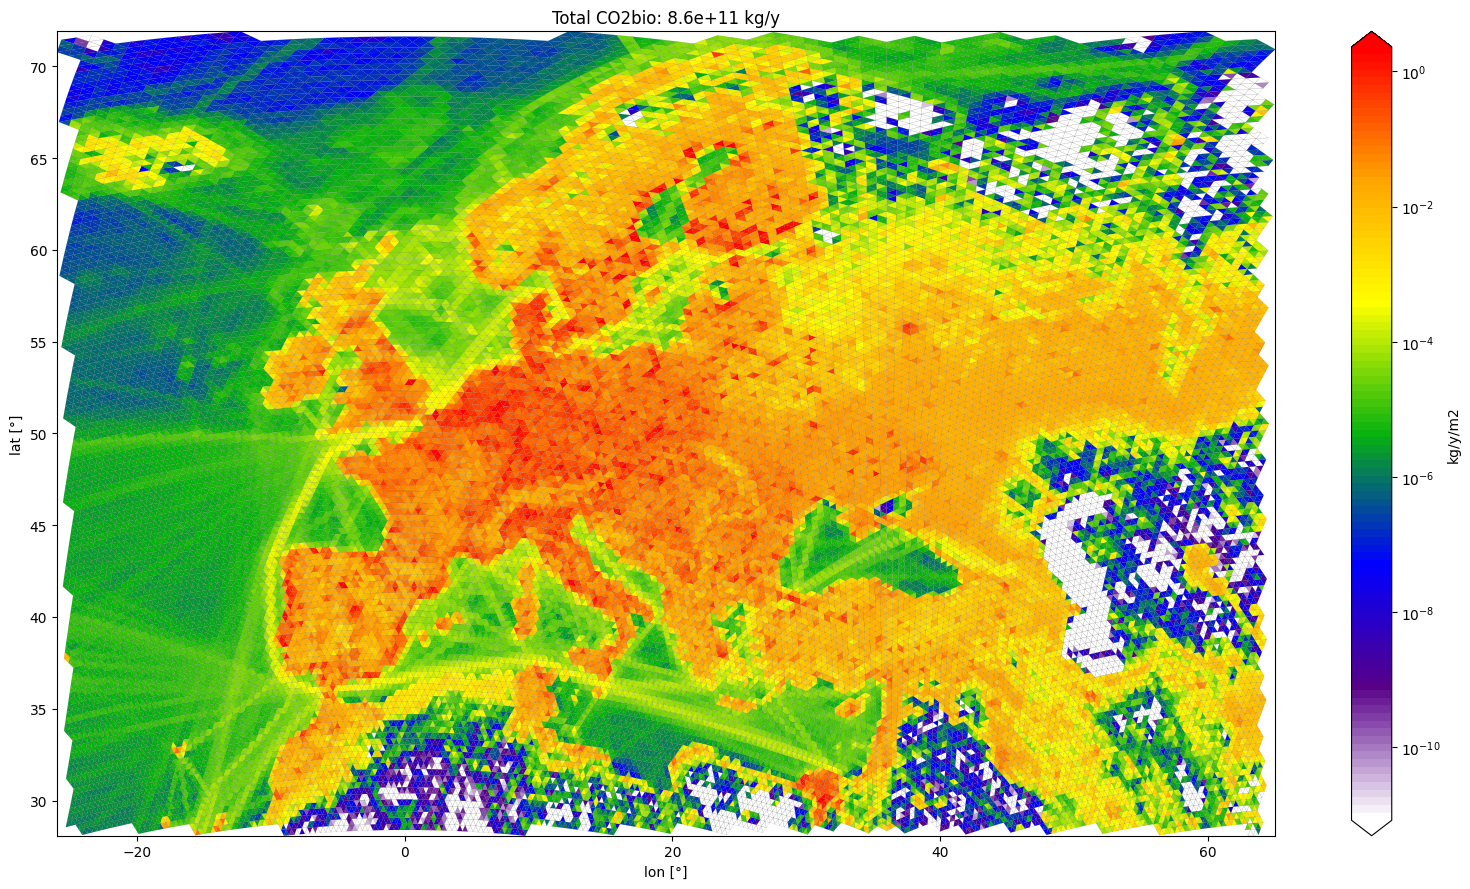

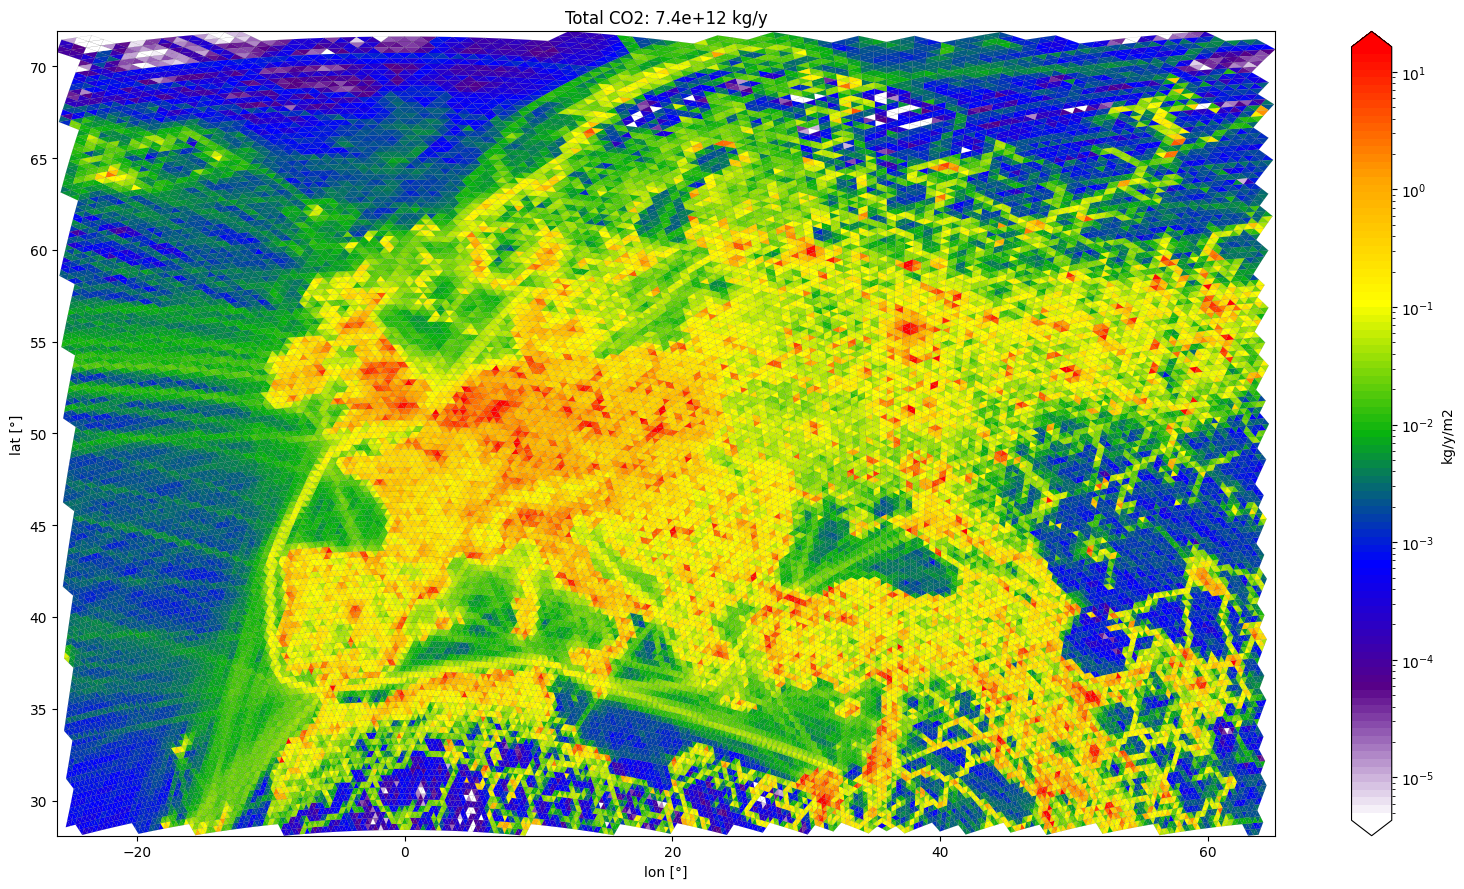

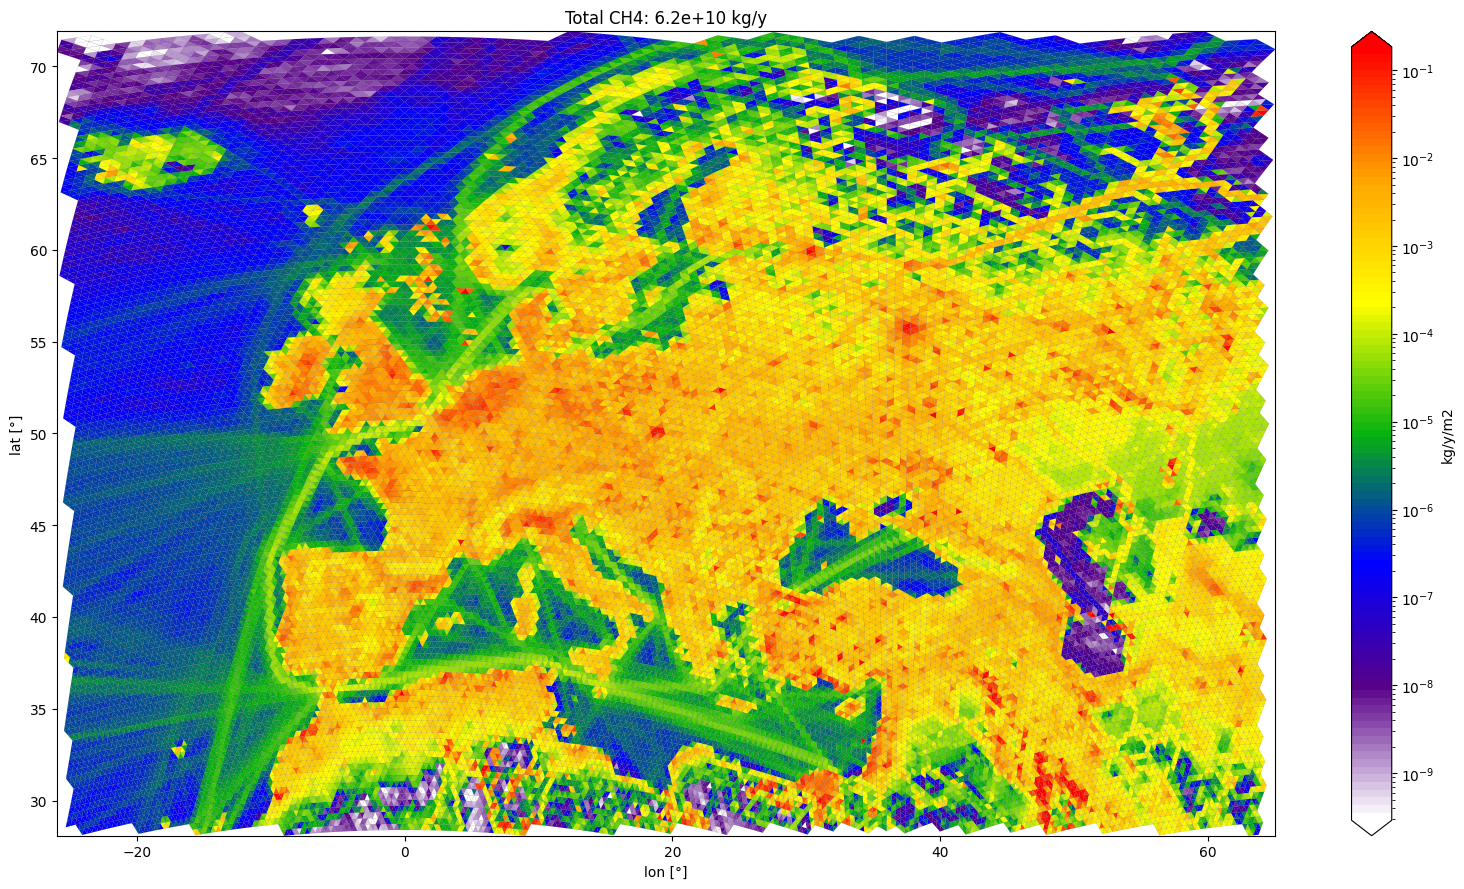

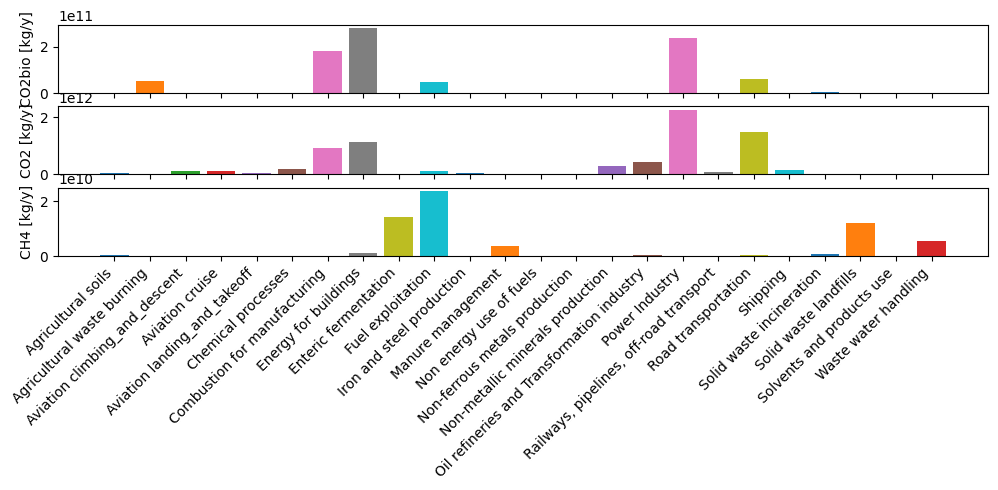

In [7]:
import matplotlib.pyplot as plt
from emiproc.plots import plot_inventory

plt.style.use("default")

plot_inventory(remaped_on_icon, total_only=True)